In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from skimage import io
from sklearn.decomposition import PCA
from numpy import linalg as LA

In [3]:
def processData():
    faces, backgrounds = [], []
    facePath = '../data/hw12/faces/'
    backPath = '../data/hw12/backgrounds/'

    for im in os.listdir(facePath):
        data = io.imread(facePath+im).flatten()
        faces.append(data)
        
    for im in os.listdir(backPath):
        data = io.imread(backPath+im).flatten()
        backgrounds.append(data)
        
    print("Faces dataset: ", np.array(faces).shape)
    print("Backgrounds dataset: ", np.array(backgrounds).shape)
    
    np.save("../data/hw12/Faces.data", np.array(faces))
    np.save("../data/hw12/Backgrounds.data", np.array(backgrounds))

processData()

Faces dataset:  (2429, 361)
Backgrounds dataset:  (3699, 361)


In [4]:
faces, backgrounds = np.load('../data/hw12/Faces.data.npy'), \
                     np.load('../data/hw12/Backgrounds.data.npy')

im_shape = (19, 19)
 
face_mean = np.mean(faces, axis=0)    

faces = faces - face_mean
backgrounds = backgrounds - face_mean

print("Faces dataset: ", faces.shape)
print("Backgrounds dataset: ", backgrounds.shape)  
print(faces[:, 0])

Faces dataset:  (2429, 361)
Backgrounds dataset:  (3699, 361)
[ 18.29271305  26.29271305   5.29271305 ... -47.70728695 -56.70728695
 -36.70728695]


# Part A

Text(0.5, 1.0, 'Eigenvalues without top three')

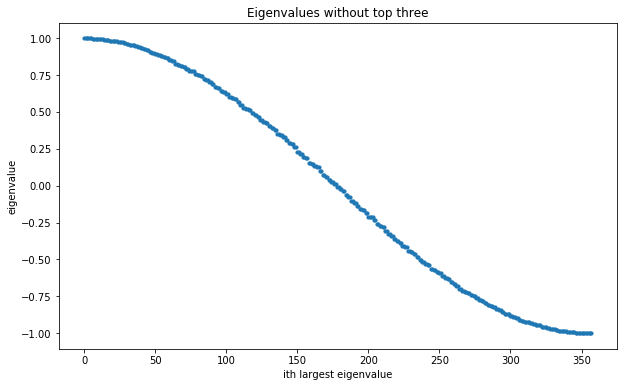

In [5]:
fPCA = PCA(n_components=faces.shape[1])
vals = fPCA.fit(faces)
evals, vectors = LA.eig(fPCA.components_)

ind = np.argsort(evals)[-3:]
evals = np.sort(evals)[::-1][3:].real

x = [i for i in range(evals.shape[0])]

matplotlib.rcParams['figure.figsize'] = [10, 6]
plt.scatter(x, evals, s=10)
plt.xlabel('ith largest eigenvalue')
plt.ylabel('eigenvalue')
plt.title('Eigenvalues without top three')


# Part B

(2429, 2)


Text(0.5, 1.0, 'Faces Projections')

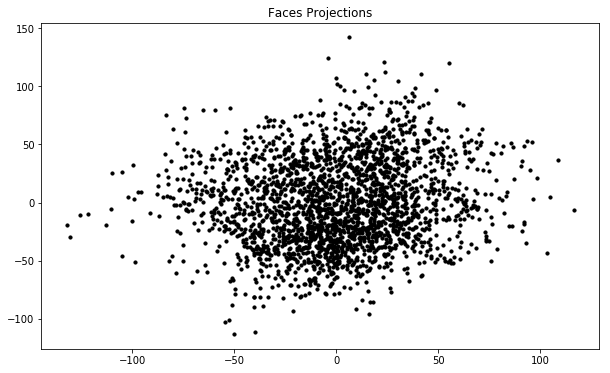

In [8]:

coords = np.matmul(vectors[ind[:-1]].real, faces.T).T
print(coords.shape)
plt.scatter(coords[:, 0], coords[:, 1], s=10, c='black')
plt.title("Faces Projections")

# Part C

In [7]:
# subtract the mean of faces from the backgrounds
'''
bPCA = PCA()
bVals = bPCA.fit(backgrounds).explained_variance_
bEvals = np.sort(bVals)[::-1][3:]

large_vals = np.sort(bVals)[::-1][:3]
ind = [np.argwhere(bVals == i) for i in large_vals]

bVectors = bPCA.components_[:, 1:3]

plt.scatter(vectors[:, 0], vectors[:, 1], s=10, c = 'black')
plt.scatter(bVectors[:, 0], bVectors[:, 1], s=10, c = 'red')
plt.title("Faces Projections")'''

'\nbPCA = PCA()\nbVals = bPCA.fit(backgrounds).explained_variance_\nbEvals = np.sort(bVals)[::-1][3:]\n\nlarge_vals = np.sort(bVals)[::-1][:3]\nind = [np.argwhere(bVals == i) for i in large_vals]\n\nbVectors = bPCA.components_[:, 1:3]\n\nplt.scatter(vectors[:, 0], vectors[:, 1], s=10, c = \'black\')\nplt.scatter(bVectors[:, 0], bVectors[:, 1], s=10, c = \'red\')\nplt.title("Faces Projections")'

# Part D

# Part E